In [30]:
import quandl
import numpy as np 
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [31]:
# Import the Data and get an overview of what is looks like.
# To analyze a different stock, enter the ticker symbol 
df = quandl.get("WIKI/NVDA")
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1999-01-22,21.00,23.44,18.63,19.69,5655600.0,0.0,1.0,1.623824,1.812497,1.440564,1.522529,67867200.0
1999-01-25,21.25,22.00,19.69,21.75,1063500.0,0.0,1.0,1.643156,1.701149,1.522529,1.681818,12762000.0
1999-01-26,22.00,22.44,19.75,20.06,715000.0,0.0,1.0,1.701149,1.735172,1.527168,1.551139,8580000.0
1999-01-27,20.13,20.63,19.00,20.00,509100.0,0.0,1.0,1.556552,1.595214,1.469174,1.546499,6109200.0
1999-01-28,20.00,20.13,19.81,19.94,474000.0,0.0,1.0,1.546499,1.556552,1.531808,1.541860,5688000.0


In [32]:
# We will be focusing on the Adj. Closing Price, which is the price the stock's closing price AFTER accounting for
# for any corporate actions.
# Below, we store it into a dataframe.

df = df[['Adj. Close']]
df.head()

,Adj. Close
Date,
1999-01-22,1.522529
1999-01-25,1.681818
1999-01-26,1.551139
1999-01-27,1.546499
1999-01-28,1.541860


In [33]:
# We use the variable below to store how long we want to predict, or forecast, the stock's behavior.
forecast_out = 30 # where 30 equals 30 days into the future
com = df[-30:] # store the last 30 days of data, we'll use this to compare it to our prediction
compare = com.to_numpy()

#Create another column (the target or dependent variable) shifted 'n' units up
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out)

df.head()

### Create the independent data set (X)  #######
# Convert the dataframe to a numpy array
X = np.array(df.drop(['Prediction'],1))

#Remove the last 'n' rows, as will be predicting them and don't want to train on those values.
X = X[:-forecast_out]


### Create the dependent data set (y)  #####
# Convert the dataframe to a numpy array (All of the values including the NaN's)
y = np.array(df['Prediction'])

# Get all of the y values except the last 'n' rows.
y = y[:-forecast_out]
print(y)

[  1.65320793   1.70578891   1.67717867 ... 232.97       244.48
 225.52      ]


In [26]:
# Split the data into 80% training and 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and train the Linear Regression  Model
lr = LinearRegression()

# Train the model
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# Testing Model: Score returns the coefficient of determination R^2 of the prediction. 
# The best possible score is 1.0

lr_test = lr.score(x_test, y_test)
print("The accuracy score for the model is: ", lr_test)

The accuracy score for the model is:  0.9775125502598009


In [28]:
# Set x_forecast equal to the last 30 rows of the original data set from Adj. Close column
x_forecast = np.array(df.drop(['Prediction'],1))[-forecast_out:]

# Print linear regression model predictions for the next 'n' days
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)

[253.06229275 262.64923988 268.1898191  265.28864967 271.00373533
 262.74739974 263.44542547 267.56813994 268.27707232 267.70992641
 263.28182569 252.60421336 257.32679369 256.35610166 263.45633213
 263.10731926 262.38748023 266.91374082 271.74538766 269.509524
 270.63290916 271.28730828 272.53066661 262.19116049 271.54906793
 270.43658942 263.11822591 253.43311892 265.98667539 245.30766316]


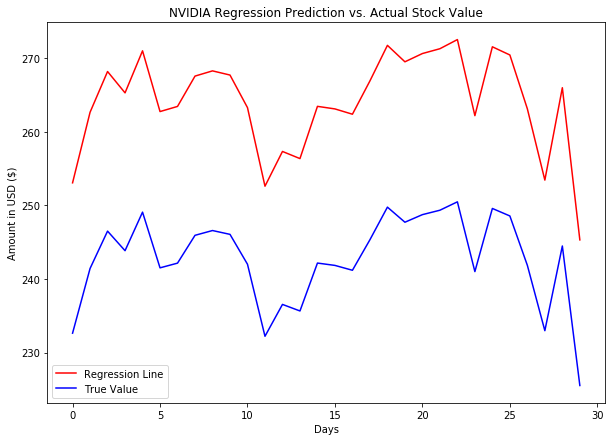

In [29]:
# Plotting prediction vs actual price over 30 day period
plt.figure(figsize=(10,7))
plt.plot(lr_prediction, c="red", label="Regression Line")
plt.plot(x_forecast, c="blue", label="True Value")
plt.title("NVIDIA Regression Prediction vs. Actual Stock Value")
plt.xlabel("Days")
plt.ylabel("Amount in USD ($)")
plt.legend()

After running this model for a number of stocks: TSLA, MSFT, NVDA, NFLX, etc, we tend to see that the model has a tendency to overfit. We observe this as the regression analysis is producing misleading R-squared values. <br>
<br>
Overfit regression models have too many terms for the number of observations. By running this model multiple times for different stocks, we tend to see the model represent the noise rather than the genuine relationships within the stocks behavior.